<a href="https://colab.research.google.com/github/ParkSeonungHun/Hun/blob/main/python_basic/%ED%83%80%EC%9D%B4%ED%8A%B8%ED%95%9C_%EB%A0%88%EC%9D%B4%EC%95%84%EC%9B%83_%EA%B0%80%EC%9D%B4%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이트한 레이아웃 가이드

타이트 레이아웃을 사용하여 그림 내에 플롯을 깔끔하게 맞추는 방법.

tight_layout 은 서브 플롯이 Figure 영역에 맞도록 서브 플롯 매개 변수를 자동으로 조정합니다. 이것은 실험적 기능이며 일부 경우에는 작동하지 않을 수 있습니다. 눈금 레이블, 축 레이블 및 제목의 범위 만 확인합니다.

tight_layout 의 대안 은 constrained_layout 입니다.

## 간단한 예

matplotlib에서 축 (서브 플롯 포함)의 위치는 정규화 된 Figure 좌표로 지정됩니다. 축 레이블 또는 제목 (또는 때로는 눈금 레이블)이 그림 영역을 벗어나서 잘릴 수 있습니다.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['savefig.facecolor'] = "0.8"


def example_plot(ax, fontsize=12):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)

plt.close('all')
fig, ax = plt.subplots()
example_plot(ax, fontsize=24)

이를 방지하려면 축의 위치를 ​​조정해야합니다. 서브 플롯의 경우 서브 플롯 매개 변수를 조정하여 수행 할 수 있습니다 ( 눈금 레이블을위한 공간을 만들기 위해 축의 가장자리 이동 ). Figure.tight_layout이 작업을 자동으로 수행하는 Matplotlib v1.1이 도입되었습니다 .

In [ ]:
fig, ax = plt.subplots()
example_plot(ax, fontsize=24)
plt.tight_layout()

참고 matplotlib.pyplot.tight_layout()가 호출되는 경우에만 부가 적 줄거리의 PARAMS을 조정합니다. 그림을 다시 그릴 때마다이 조정을 수행하려면을 호출 fig.set_tight_layout(True)하거나 rcParams["figure.autolayout"](기본값 :)을로 설정할 False수 True있습니다.

여러 개의 서브 플롯이있는 경우 서로 겹치는 서로 다른 축의 레이블을 자주 볼 수 있습니다.

In [ ]:
plt.close('all')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

tight_layout() 겹침을 최소화하기 위해 서브 플롯 사이의 간격도 조정합니다.

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout()

tight_layout()pad , w_pad 및 h_pad 의 키워드 인수를 사용할 수 있습니다 . 이들은 그림 테두리 주변과 서브 플롯 사이의 추가 패딩을 제어합니다. 패드는 글꼴 크기의 비율로 지정됩니다.

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

tight_layout()그리드 사양이 호환되는 한 서브 플롯의 크기가 다른 경우에도 작동합니다. 아래 예에서 ax1 및 ax2 는 2x2 그리드의 서브 플롯이고 ax3 은 1x2 그리드의 서브 플롯입니다 .

In [ ]:
plt.close('all')
fig = plt.figure()

ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)

plt.tight_layout()

로 생성 된 서브 플롯에서 작동합니다 subplot2grid(). 일반적으로 gridspec ( GridSpec 및 기타 기능을 사용하여 그림 레이아웃 사용자 정의) 에서 생성 된 서브 플롯 이 작동합니다.

In [ ]:
plt.close('all')
fig = plt.figure()

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

plt.tight_layout()

철저히 테스트되지는 않았지만 aspect! = "auto"(예 : 이미지가있는 축)의 서브 플롯에서 작동하는 것 같습니다.

In [ ]:
arr = np.arange(100).reshape((10, 10))

plt.close('all')
fig = plt.figure(figsize=(5, 4))

ax = plt.subplot(111)
im = ax.imshow(arr, interpolation="none")

plt.tight_layout()

## 주의 사항

* tight_layout기본적으로 축의 모든 아티스트를 고려합니다. 레이아웃 계산에서 아티스트를 제거하려면을 호출 할 수 있습니다 Artist.set_in_layout.
* tight_layout아티스트에게 필요한 추가 공간이 축의 원래 위치와 무관하다고 가정합니다. 이것은 종종 사실이지만 그렇지 않은 경우가 드뭅니다.
* pad=0일부 텍스트를 몇 픽셀로자를 수 있습니다. 이것은 현재 알고리즘의 버그 또는 제한 일 수 있으며 그 원인이 명확하지 않습니다. 한편, 0.3보다 큰 패드를 사용하는 것이 좋습니다.

## GridSpec과 함께 사용

GridSpec에는 자체 GridSpec.tight_layout메서드가 있습니다 (pyplot api pyplot.tight_layout도 작동 함).

In [ ]:
import matplotlib.gridspec as gridspec

plt.close('all')
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig)

선택적 rect 매개 변수를 제공 하여 서브 플롯이 내부에 들어갈 경계 상자를 지정할 수 있습니다. 좌표는 정규화 된 그림 좌표 여야하며 기본값은 (0, 0, 1, 1)입니다.

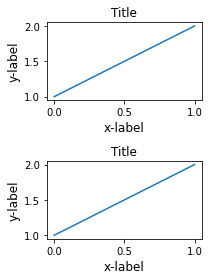

In [10]:
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig, rect=[0, 0, 0.5, 1])

예를 들어 여러 gridspec이있는 Figure에 사용할 수 있습니다.

In [ ]:
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig, rect=[0, 0, 0.5, 1])

gs2 = gridspec.GridSpec(3, 1)

for ss in gs2:
    ax = fig.add_subplot(ss)
    example_plot(ax)
    ax.set_title("")
    ax.set_xlabel("")

ax.set_xlabel("x-label", fontsize=12)

gs2.tight_layout(fig, rect=[0.5, 0, 1, 1], h_pad=0.5)

# We may try to match the top and bottom of two grids ::
top = min(gs1.top, gs2.top)
bottom = max(gs1.bottom, gs2.bottom)

gs1.update(top=top, bottom=bottom)
gs2.update(top=top, bottom=bottom)
plt.show()

이 정도면 충분하지만 상단과 하단을 조정하려면 hspace를 조정해야 할 수도 있습니다. hspace 및 vspace를 업데이트하려면 업데이트 GridSpec.tight_layout된 rect 인수로 다시 호출 합니다. rect 인수는 ticklabels 등을 포함하는 영역을 지정합니다. 따라서 각 gridspec의 위와 아래 사이의 차이로 아래 (일반적인 경우 0)를 늘립니다. 정상도 마찬가지입니다.

In [ ]:
fig = plt.gcf()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig, rect=[0, 0, 0.5, 1])

gs2 = gridspec.GridSpec(3, 1)

for ss in gs2:
    ax = fig.add_subplot(ss)
    example_plot(ax)
    ax.set_title("")
    ax.set_xlabel("")

ax.set_xlabel("x-label", fontsize=12)

gs2.tight_layout(fig, rect=[0.5, 0, 1, 1], h_pad=0.5)

top = min(gs1.top, gs2.top)
bottom = max(gs1.bottom, gs2.bottom)

gs1.update(top=top, bottom=bottom)
gs2.update(top=top, bottom=bottom)

top = min(gs1.top, gs2.top)
bottom = max(gs1.bottom, gs2.bottom)

gs1.tight_layout(fig, rect=[None, 0 + (bottom-gs1.bottom),
                            0.5, 1 - (gs1.top-top)])
gs2.tight_layout(fig, rect=[0.5, 0 + (bottom-gs2.bottom),
                            None, 1 - (gs2.top-top)],
                 h_pad=0.5)

## 범례 및 주석

Matplotlib 2.2 이전 버전, 범례 및 주석은 레이아웃을 결정하는 경계 상자 계산에서 제외되었습니다. 결과적으로 이러한 아티스트가 계산에 추가되었지만 때로는 포함하는 것이 바람직하지 않습니다. 예를 들어,이 경우 범례를위한 공간을 만들기 위해 축을 약간 쪼개는 것이 좋습니다.

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
lines = ax.plot(range(10), label='A simple plot')
ax.legend(bbox_to_anchor=(0.7, 0.5), loc='center left',)
fig.tight_layout()
plt.show()

그러나 때때로 이것은 바람직하지 않습니다 (를 사용할 때 자주 사용됨 ). 경계 상자 계산에서 범례를 제거하려면 해당 경계를 설정하기 만하면 범례가 무시됩니다.fig.savefig('outname.png', bbox_inches='tight')leg.set_in_layout(False)

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
lines = ax.plot(range(10), label='B simple plot')
leg = ax.legend(bbox_to_anchor=(0.7, 0.5), loc='center left',)
leg.set_in_layout(False)
fig.tight_layout()
plt.show()

## AxesGrid1과 함께 사용

제한적이지만 mpl_toolkits.axes_grid1지원됩니다.

In [ ]:
from mpl_toolkits.axes_grid1 import Grid

plt.close('all')
fig = plt.figure()
grid = Grid(fig, rect=111, nrows_ncols=(2, 2),
            axes_pad=0.25, label_mode='L',
            )

for ax in grid:
    example_plot(ax)
ax.title.set_visible(False)

plt.tight_layout()

## 컬러 바

컬러 바를 사용하여 Figure.colorbar컬러 바를 생성하는 경우 생성 된 컬러 바는 상위 좌표축도 서브 플롯 인 한 서브 플롯에 그려 지므로 Figure.tight_layout작동합니다.

In [ ]:
plt.close('all')
arr = np.arange(100).reshape((10, 10))
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(arr, interpolation="none")

plt.colorbar(im)

plt.tight_layout()

또 다른 옵션은 AxesGrid1 툴킷을 사용하여 컬러 바에 대한 축을 명시 적으로 생성하는 것입니다.

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.close('all')
arr = np.arange(100).reshape((10, 10))
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(arr, interpolation="none")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)

plt.tight_layout()